### Loading libraries

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Loading data

Data collected in State-Sponsored Homophobia 2020: Global Legislation Overview Update (published in December 2020).
https://ilga.org/maps-sexual-orientation-laws

In [5]:
df = pd.read_csv("omophobia.csv", encoding='latin-1', delimiter=';')

### Inspecting data

In [7]:
df.shape

(241, 14)

In [6]:
df.head()

,COUNTRY,CSSSA LEGAL?,DATE OF DECRIM,MAX PENALTY,CONST.,BROAD PROT.,EMPLOY.,HATE CRIME,INCITEMENT,BAN CONV. THERAPIES,SAME SEX MARRIAGE,CIVIL UNIONS,JOINT ADOPTION,SECOND PARENT ADOPTION
0,Algeria,NO,-,2,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
1,Angola,YES,2021,-,NO,YES,YES,YES,YES,NO,NO,NO,NO,NO
2,Benin,YES,NEVER CRIM,-,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
3,Botswana,YES,2019,-,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO
4,Burkina Faso,YES,NEVER CRIM,-,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO


COUNTRY
Country

CSSSA LEGAL?
Criminalisation of Consensual Same-Sex Sexual Acts between Adults

DATE OF DECRIM
Date of decriminalisation

MAX PENALTY
Max Penalty

CONST.
Constitutional Protection

BROAD PROT.
Broad Protection

EMPLOY.
Employement Protection

HATE CRIME
Hate Crime

INCITEMENT
Incitement

BAN CONV. THERAPIES
Ban Conversion Therapies

In [12]:
pd.set_option('display.max_rows', None)

In [13]:
df["COUNTRY"].value_counts()

COUNTRY
Algeria                        1
South Korea                    1
Italy                          1
Latvia                         1
Liechtenstein                  1
Lithuania                      1
Luxembourg                     1
Malta                          1
Moldova                        1
Monaco                         1
Montenegro                     1
Netherlands                    1
North Macedonia                1
Norway                         1
Poland                         1
Portugal                       1
Romania                        1
Russia                         1
San Marino                     1
Serbia                         1
Slovakia                       1
Slovenia                       1
Spain                          1
Sweden                         1
Switzerland                    1
Turkey                         1
Ukraine                        1
United Kingdom                 1
Australia                      1
Ireland                        1
Ic

### Gender Development Index (GDI) 2020

https://ourworldindata.org/human-development-index


The UNDP also publishes the Gender Development Index (GDI).9

It characterizes human development like the HDI and the IHDI, but it acknowledges that life expectancy, expected and average access to education, and income differ between men and women.

It uses gender-specific data across three dimensions (such as incomes for men and women) to calculate HDIs for men and women separately.10

The GDI is the ratio of the female HDI to the male HDI. Values below 1 indicate higher human development for men than women, while values above 1 indicate the opposite. Values closer to 1 therefore indicate higher gender equality.

It covers almost all countries since 1990.

In addition to the index itself, it is also used to classify countries into groups depending on how gender-equal they are.

In [14]:
df_gdi = pd.read_csv("./GDI/gender-development-index.csv")

In [15]:
df_gdi.shape

(180, 5)

Values below 1 indicate higher human development for men than women

In [16]:
df_gdi.head()

,Entity,Code,Year,Gender Development Index,time
0,Afghanistan,AFG,2020,0.695,2020
1,Albania,ALB,2020,0.978,2020
2,Algeria,DZA,2020,0.879,2020
3,Angola,AGO,2020,0.906,2020
4,Argentina,ARG,2020,0.999,2020


### Share of people living in urban areas

https://ourworldindata.org/urbanization


How does the share of people living in urban areas vary between countries?

In the chart shown below, we see the share of the population that is urbanized across the world.

Across most high-income countries – across Western Europe, the Americas, Australia, Japan, and the Middle East – more than 80% of the population lives in urban areas. Across most upper-middle-income countries – in Eastern Europe, East Asia, North and Southern Africa, and South America – between 50% to 80% of people do. In many low to lower-middle-income countries, the majority still live in rural areas.

But this is changing quickly. You can see how urbanization rates are changing with time using the "Edit countries and regions" toggle on the interactive chart. For many countries, you see a rapid migration of populations into towns and cities.

In [17]:
df_urban = pd.read_csv("./Urban/share-of-population-urban.csv")

In [18]:
df_urban.shape

(14427, 4)

In [20]:
df_urban_2020 = df_urban[df_urban['Year'] == 2020]

In [21]:
df_urban_2020.shape

(229, 4)

In [22]:
df_urban_2020.head()

,Entity,Code,Year,Urban population (% of total population)
60,Afghanistan,AFG,2020,26.026
123,Albania,ALB,2020,62.112
186,Algeria,DZA,2020,73.733
249,American Samoa,ASM,2020,87.153
312,Andorra,AND,2020,87.916


### Merging

In [23]:
urban_gdi = pd.merge(df_urban_2020, df_gdi, on=['Entity', 'Code', 'Year'], how='inner')

final_df = pd.merge(urban_gdi, df, left_on='Entity', right_on='COUNTRY', how='inner')

In [24]:
final_df.shape

(171, 20)

In [26]:
final_df = final_df.drop(columns=['Entity', 'Year', 'time', 'Code'])

In [27]:
final_df.head()

,Urban population (% of total population),Gender Development Index,COUNTRY,CSSSA LEGAL?,DATE OF DECRIM,MAX PENALTY,CONST.,BROAD PROT.,EMPLOY.,HATE CRIME,INCITEMENT,BAN CONV. THERAPIES,SAME SEX MARRIAGE,CIVIL UNIONS,JOINT ADOPTION,SECOND PARENT ADOPTION
0,26.026,0.695,Afghanistan,NO,-,DEATH (P),NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
1,62.112,0.978,Albania,YES,1995,-,NO,YES,YES,YES,YES,NO,NO,NO,NO,NO
2,73.733,0.879,Algeria,NO,-,2,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
3,66.825,0.906,Angola,YES,2021,-,NO,YES,YES,YES,YES,NO,NO,NO,NO,NO
4,92.111,0.999,Argentina,YES,1903,-,NO,LIMITED,LIMITED,YES,NO,LIMITED,YES,YES,YES,YES


### converting to binary

In [29]:
columns_to_convert = [
    'CSSSA LEGAL?', 'CONST.', 'BROAD PROT.', 'EMPLOY.',
    'HATE CRIME', 'INCITEMENT', 'BAN CONV. THERAPIES',
    'SAME SEX MARRIAGE', 'CIVIL UNIONS', 'JOINT ADOPTION', 'SECOND PARENT ADOPTION'
]

final_df[columns_to_convert] = final_df[columns_to_convert].replace({'YES': 1, 'NO': 0})


/var/folders/pp/5g1jt_cx32g8hd0lgc29gzxh0000gn/T/ipykernel_88258/2150130395.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df[columns_to_convert] = final_df[columns_to_convert].replace({'YES': 1, 'NO': 0})


In [30]:
final_df.head()

,Urban population (% of total population),Gender Development Index,COUNTRY,CSSSA LEGAL?,DATE OF DECRIM,MAX PENALTY,CONST.,BROAD PROT.,EMPLOY.,HATE CRIME,INCITEMENT,BAN CONV. THERAPIES,SAME SEX MARRIAGE,CIVIL UNIONS,JOINT ADOPTION,SECOND PARENT ADOPTION
0,26.026,0.695,Afghanistan,0,-,DEATH (P),0,0,0,0,0,0,0,0,0,0
1,62.112,0.978,Albania,1,1995,-,0,1,1,1,1,0,0,0,0,0
2,73.733,0.879,Algeria,0,-,2,0,0,0,0,0,0,0,0,0,0
3,66.825,0.906,Angola,1,2021,-,0,1,1,1,1,0,0,0,0,0
4,92.111,0.999,Argentina,1,1903,-,0,LIMITED,LIMITED,1,0,LIMITED,1,1,1,1


In [32]:
columns_with_limited = ['BROAD PROT.', 'EMPLOY.', 'HATE CRIME', 
                        'INCITEMENT', 'BAN CONV. THERAPIES', 
                        'CIVIL UNIONS', 'JOINT ADOPTION', 
                        'SECOND PARENT ADOPTION']

In [33]:
final_df[columns_with_limited] = final_df[columns_with_limited].replace({'LIMITED': 0.5})


/var/folders/pp/5g1jt_cx32g8hd0lgc29gzxh0000gn/T/ipykernel_88258/3669822172.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df[columns_with_limited] = final_df[columns_with_limited].replace({'LIMITED': 0.5})


In [35]:
final_df = final_df.drop(columns=['MAX PENALTY'])

In [37]:
final_df = final_df.drop(columns=['DATE OF DECRIM'])

In [39]:
final_df['CSSSA LEGAL?'] = final_df['CSSSA LEGAL?'].replace({'DE FACTO': 1})

/var/folders/pp/5g1jt_cx32g8hd0lgc29gzxh0000gn/T/ipykernel_88258/198232708.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df['CSSSA LEGAL?'] = final_df['CSSSA LEGAL?'].replace({'DE FACTO': 1})


In [41]:
final_df.head()

,Urban population (% of total population),Gender Development Index,COUNTRY,CSSSA LEGAL?,CONST.,BROAD PROT.,EMPLOY.,HATE CRIME,INCITEMENT,BAN CONV. THERAPIES,SAME SEX MARRIAGE,CIVIL UNIONS,JOINT ADOPTION,SECOND PARENT ADOPTION
0,26.026,0.695,Afghanistan,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,62.112,0.978,Albania,1,0,1.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0.0
2,73.733,0.879,Algeria,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,66.825,0.906,Angola,1,0,1.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0.0
4,92.111,0.999,Argentina,1,0,0.5,0.5,1.0,0.0,0.5,1,1.0,1.0,1.0


# PLOTS

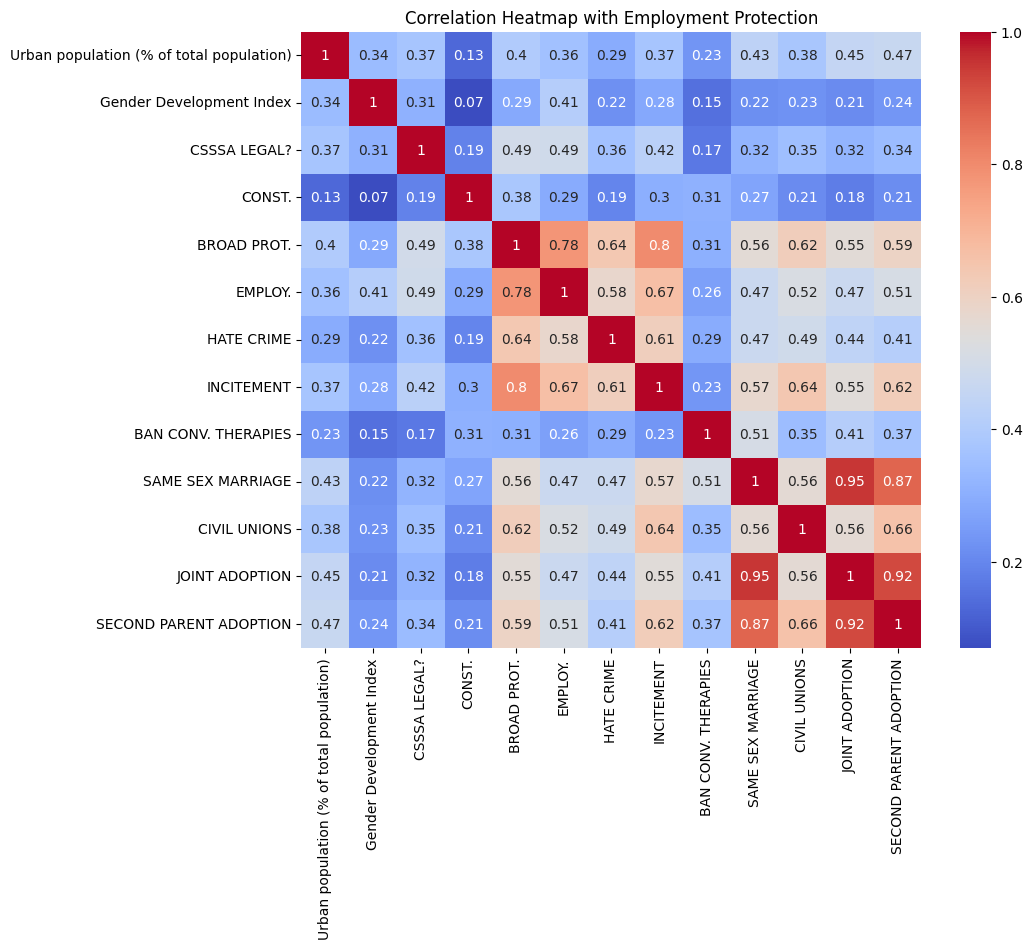

In [47]:
numeric_columns = final_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Employment Protection')
plt.show()


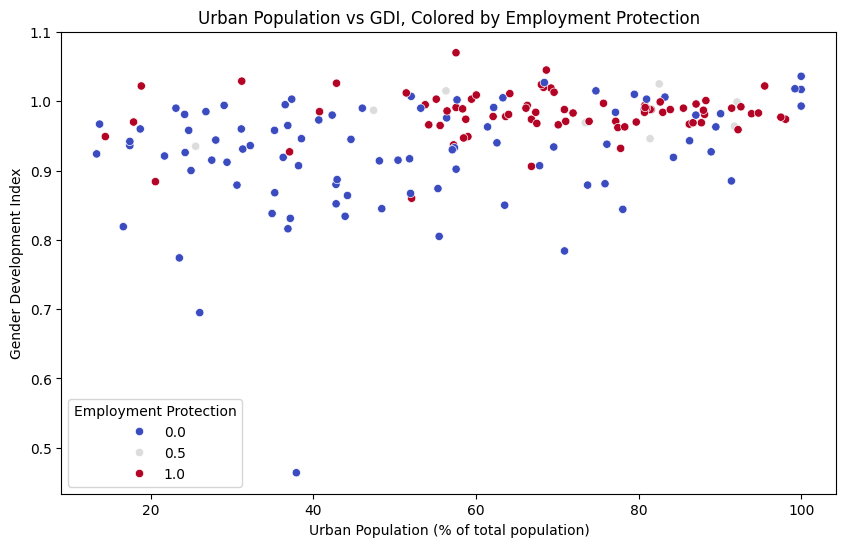

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=final_df,
    x='Urban population (% of total population)',
    y='Gender Development Index',
    hue='EMPLOY.',
    palette='coolwarm'
)
plt.title('Urban Population vs GDI, Colored by Employment Protection')
plt.xlabel('Urban Population (% of total population)')
plt.ylabel('Gender Development Index')
plt.legend(title='Employment Protection')
plt.show()

In [56]:
import plotly.express as px

In [98]:
custom_colorscale = [[0, 'red'], [1, 'green']] 


fig = px.scatter(
    final_df,
    x='Urban population (% of total population)',
    y='Gender Development Index',
    color='EMPLOY.', 
    hover_data=['COUNTRY', 'CONST.', 'BROAD PROT.'],  
    color_continuous_scale=custom_colorscale, 
    title='Urban Population vs GDI, Colored by Employment Protection'
)


fig.update_layout(
    coloraxis_colorbar=dict(
        title="Employment Protection",
        tickvals=[0, 1], 
        ticktext=['Bad (0)', 'Good (1)']
    ),
    xaxis_title="Urban Population (% of total population)",
    yaxis_title="Gender Development Index"
)


fig.show()


In [60]:
fig = px.choropleth(
    final_df,
    locations="COUNTRY",
    locationmode="country names",
    color="EMPLOY.",
    hover_name="COUNTRY",
    hover_data={
        "BROAD PROT.": True,
        "HATE CRIME": True,
        "INCITEMENT": True,
        "Gender Development Index": True,
        "Urban population (% of total population)": True
    },
    title="Employment Protection for LGBT Individuals by Country",
    color_continuous_scale=[[0, 'red'], [1, 'green']]
)

fig.update_layout(
    coloraxis_colorbar=dict(
        title="Employment Protection",
        tickvals=[0, 1],
        ticktext=["Bad (0)", "Good (1)"]
    )
)

fig.show()

### Clustering

In [76]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [77]:
numeric_data = final_df.drop(columns=["COUNTRY"])
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [78]:
dbscan = DBSCAN(eps=0.5, min_samples=2)  # Adjust parameters as needed
labels = dbscan.fit_predict(scaled_data)

# Add cluster labels to the original dataframe
df["Cluster"] = labels

In [79]:
fig = px.scatter(
    df,
    x="Urban population (% of total population)",
    y="Gender Development Index",
    color=df["Cluster"].astype(str),  # Convert cluster labels to string for color coding
    hover_name="COUNTRY",
    title="DBSCAN Clustering of Countries",
    labels={"Cluster": "Cluster"},
)
fig.show()


In [82]:
# Calculate mean values for key features by cluster
cluster_summary = df.groupby("Cluster")[["EMPLOY.", "Gender Development Index", "Urban population (% of total population)"]].mean()

# Print the summary
print(cluster_summary)



          EMPLOY.  Gender Development Index  \
Cluster                                       
-1       0.782609                  0.971543   
 0       0.000000                  0.912370   
 1       1.000000                  0.977286   
 2       0.000000                  0.936200   
 3       1.000000                  0.982800   
 4       1.000000                  0.958750   
 5       1.000000                  1.005000   
 6       1.000000                  0.993500   
 7       1.000000                  1.000333   
 8       1.000000                  0.979000   
 9       1.000000                  1.011000   
 10      1.000000                  0.987000   
 11      1.000000                  0.998333   
 12      1.000000                  0.980000   
 13      0.500000                  0.966500   

         Urban population (% of total population)  
Cluster                                            
-1                                      67.234130  
 0                                      48.5

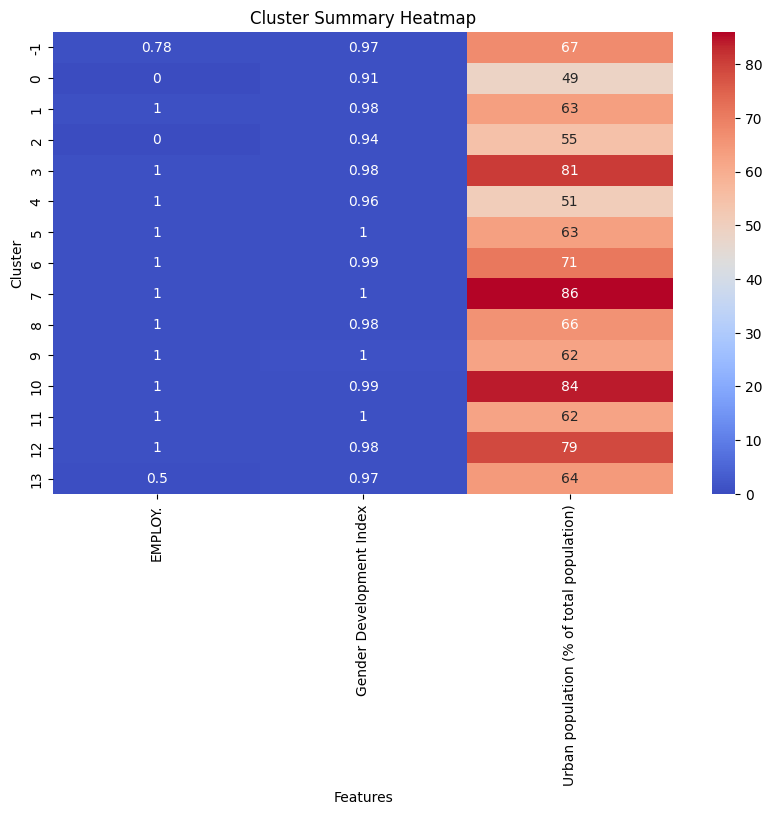

In [84]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, cmap="coolwarm")
plt.title("Cluster Summary Heatmap")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()


This heatmap summarizes the clusters formed by DBSCAN, showing the average values for employment protection (EMPLOY.), Gender Development Index (GDI), and urban population percentage for each cluster. Clusters with high GDI (close to 1) and urban population (e.g., Cluster 5) tend to have full employment protection, while clusters with low employment protection (e.g., Cluster 0) often correspond to lower urban population and GDI values.

## Feature importance

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [95]:
X = df.drop(columns=["EMPLOY.", "COUNTRY", "Cluster"])  # Features (excluding target and country)
y = (df["EMPLOY."] > 0.5).astype(int)  # Convert fractional values to 0 or 1


# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [96]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

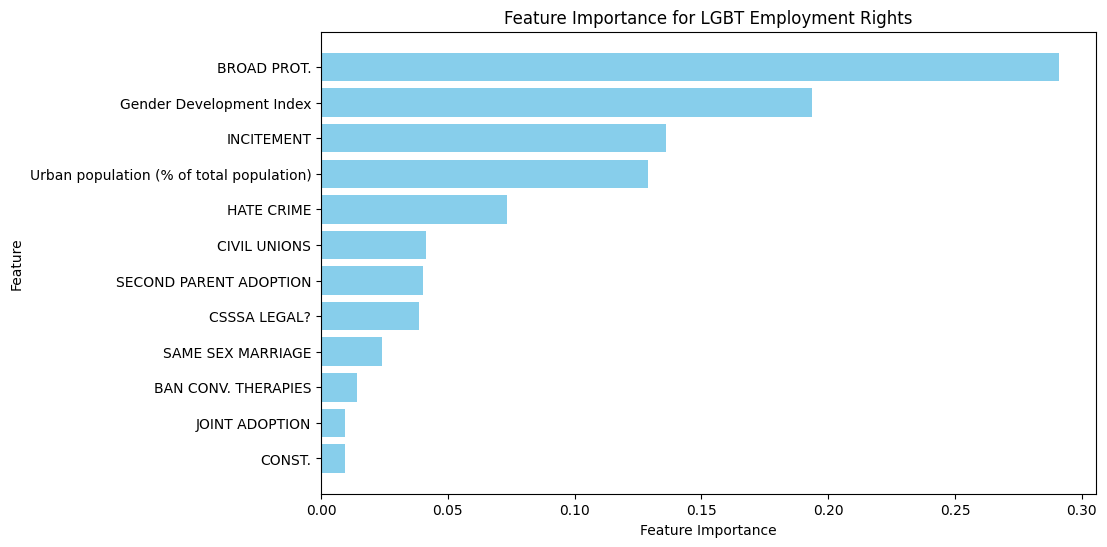

In [97]:
features = X.columns
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for LGBT Employment Rights")
plt.gca().invert_yaxis() 
plt.show()